### **Mengimport module yang akan digunakan (numpy, pandas, dan scipy) dan Mengimport dan menampilkan dataset**

# **PRE-PROCESSING CHAMPIONS DATASET**

### **About Dataset**

**wintotal:** Jumlah total pertandingan yang telah dimainkan oleh tim.

**lose_total:** Jumlah total pertandingan yang telah kalah oleh tim.

**sum_blue_side:** Jumlah total pertandingan yang dimenangkan oleh tim biru (blue side).

**win_blue_side:** Jumlah pertandingan yang dimenangkan oleh tim biru (blue side).

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [21]:
data = pd.read_excel("championss.xlsx")
print("describe = \n",data.describe())
print("head = \n",data.head())
variabel = ['wintotal', 'lose_total','sum_blue_side','win_blue_side']

describe = 
          wintotal  lose_total  sum_blue_side  win_blue_side
count  108.000000  108.000000     108.000000     108.000000
mean     5.898148    5.870370       5.879630       3.194444
std      6.983211    5.850302       6.919723       4.296180
min      0.000000    0.000000       0.000000       0.000000
25%      1.000000    1.000000       1.000000       0.000000
50%      3.500000    4.000000       4.000000       2.000000
75%      9.000000    9.250000       8.250000       5.000000
max     33.000000   25.000000      35.000000      24.000000
head = 
    wintotal  lose_total  sum_blue_side  win_blue_side
0        33          17             28             21
1        24          25             23             12
2        24          24             27             14
3        29          17             35             24
4        23          20             20             10


### **Mendeteksi outlier**

In [22]:
outliers = []
def detect_outlier(data):

    threshold = 3
    mean_1 = np.mean(data)
    std_1 = np.std(data)

    for y in data:
        z_score= (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

for var in variabel:
    outlier_datapoints = detect_outlier(data[var])
    print("Outlier ", var, " = ", outlier_datapoints)

print()

Outlier  wintotal  =  [33, 29]
Outlier  lose_total  =  [33, 29, 25, 24]
Outlier  sum_blue_side  =  [33, 29, 25, 24, 28, 27, 35, 27]
Outlier  win_blue_side  =  [33, 29, 25, 24, 28, 27, 35, 27, 21, 24]



### **Melakukan remove outlier, kemudian mengecek apakah data outlier pada variabel BloodSugar sudah terhapus dengan menggunakan salah satu nilai data outliernya**

In [23]:
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_data = data[filtered_entries]

print(new_data)

     wintotal  lose_total  sum_blue_side  win_blue_side
4          23          20             20             10
6          24          14             20             13
7          18          15             13              8
8          16          17             14              7
9          19          11             15             10
..        ...         ...            ...            ...
103         0           1              1              0
104         0           1              0              0
105         0           1              0              0
106         0           1              0              0
107         0           1              0              0

[103 rows x 4 columns]


### **Mendeteksi missing value**

In [24]:
print(data.isna().sum())

wintotal         0
lose_total       0
sum_blue_side    0
win_blue_side    0
dtype: int64


Karena tidak ditemukan adanya missing value maka tidak perlu dilakukan langkah-langkah penanganan terhadap missing value

In [25]:
from sklearn import preprocessing
import scipy.stats as stats

# Normalisasi data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
df_normalized = pd.DataFrame(np_scaled)

# Pembacaan data setelah dinormalisasi
print("\nData hasil normalisasi:\n", df_normalized)


Data hasil normalisasi:
             0     1         2         3
0    1.000000  0.68  0.800000  0.875000
1    0.727273  1.00  0.657143  0.500000
2    0.727273  0.96  0.771429  0.583333
3    0.878788  0.68  1.000000  1.000000
4    0.696970  0.80  0.571429  0.416667
..        ...   ...       ...       ...
103  0.000000  0.04  0.028571  0.000000
104  0.000000  0.04  0.000000  0.000000
105  0.000000  0.04  0.000000  0.000000
106  0.000000  0.04  0.000000  0.000000
107  0.000000  0.04  0.000000  0.000000

[108 rows x 4 columns]


# **Seleksi dan Ekstraksi Fitur**

Memilih kolom win_blue_side dengan nilai >6 dan < 20

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [43]:
# Filter data based on conditions
data = data[(data['win_blue_side'] >= 6) & (data['win_blue_side'] <= 18)]

# Select all columns in data1
data1 = data.copy()

# Selecting features and target variable
X = data1.iloc[:, :4]
X

,wintotal,lose_total,sum_blue_side,win_blue_side
1,24,25,23,12
2,24,24,27,14
4,23,20,20,10
5,22,21,27,13
6,24,14,20,13
7,18,15,13,8
8,16,17,14,7
9,19,11,15,10
10,11,18,14,8
11,16,11,15,10


In [44]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
idx = kmeans.fit_predict(X_scaled)
c = kmeans.cluster_centers_
sumd = kmeans.inertia_

# Display k-means results
print("K-Means Clustering Results:")
print("Cluster Assignments:", idx)
print("Cluster Centers:")
print(c)
print("Sum of Squared Distances to Closest Centroid (Inertia):", sumd)

K-Means Clustering Results:
Cluster Assignments: [2 2 2 2 2 0 3 0 3 0 3 3 3 3 1 1 1 1 1]
Cluster Centers:
[[ 3.59442577e-01 -1.04451591e-01 -1.16144427e-01  1.73235573e-01]
 [-1.03127343e+00 -1.15941266e+00 -1.11498650e+00 -7.48377675e-01]
 [ 1.42731380e+00  1.22208362e+00  1.46341978e+00  1.38449870e+00]
 [-5.09754928e-01 -3.89551938e-18 -2.32288854e-01 -6.16718640e-01]]
Sum of Squared Distances to Closest Centroid (Inertia): 12.283403007141949


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
# Perform PCA
pca = PCA(n_components=2)
score = pca.fit_transform(X_scaled)

# Extract principal components
pc1 = score[:, 0]
pc2 = score[:, 1]

In [55]:
# Display PCA results
print("Principal Components:")
print("PC1:", pc1)
print("PC2:", pc2)

# Display other PCA results
print("\nOther PCA Results:")
print("Coefficients:")
print(pca.components_)
print("\nExplained Variance:")
print(pca.explained_variance_)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("\nSingular Values:")
print(pca.singular_values_)
print("\nMean:")
print(pca.mean_)

Principal Components:
PC1: [ 3.00612952  3.68702241  1.88019293  3.08338452  2.11034725  0.00521621
 -0.13729378  0.37501505 -0.34542209  0.09033164 -0.96218907 -0.69051352
 -1.22320157 -0.74285027 -2.00118124 -2.11974662 -2.32814865 -1.60743779
 -2.07965494]
PC2: [-0.49250339  0.08146347 -0.3876261   0.13383163  1.09737599 -0.37075496
 -0.92639853  0.61159675 -0.95609961  0.51862179 -0.51461741 -0.16630027
 -0.41681463  0.24739646 -0.04344274 -0.26521214 -0.43800965  1.27278314
  1.01471021]

Other PCA Results:
Coefficients:
[[ 0.50948242  0.47072822  0.53017646  0.48760182]
 [ 0.16639224 -0.76465611 -0.05160308  0.62044483]]

Explained Variance:
[3.59398354 0.42308506]

Explained Variance Ratio:
[0.85120663 0.10020436]

Singular Values:
[8.0431153  2.75962519]

Mean:
[ 6.42760698e-17 -2.33731163e-17  0.00000000e+00 -2.13279686e-16]


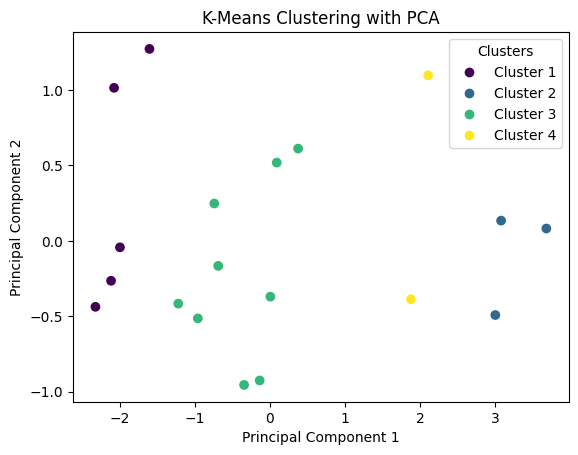

In [56]:
# Plotting the results with color legend
plt.figure()
scatter = plt.scatter(pc1, pc2, c=idx, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding color legend
legend_labels = [f'Cluster {i+1}' for i in range(max(idx)+1)]
plt.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

plt.show()